In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
iris=load_iris()

# iris数据集的各种属性

### .DESCR : 描述文件

### .feature_names : 特性名称

### .data : 数据本身

### .target : 分类

### .target_names: 分类名称 

In [17]:
x=iris.data
y=iris.target

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred=knn.predict(x_test)
print y_pred

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]


In [25]:
print knn.score(x_test,y_test)

0.973684210526


In [28]:
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print scores

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]


In [29]:
print scores.mean()

0.973333333333


In [30]:
import matplotlib.pyplot as plt

In [33]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    loss=-cross_val_score(knn,x,y,cv=10,scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())

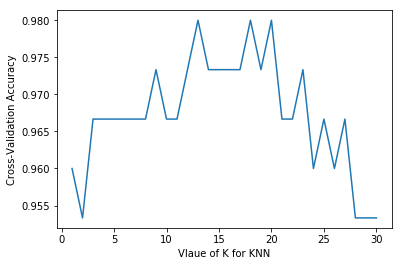

In [52]:
plt.plot(k_range,k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [34]:
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [49]:
sum_scores=0
count_scores=len(k_scores)
for i in k_scores:
    sum_scores=sum_scores+i
print sum_scores
print count_scores
print sum_scores/count_scores

29.02
30
0.967333333333
